# Introduction to Linear Algebra <br> (Python, NumPy & Torch)

## Code Preamble

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import torch

## Resources

Forked from, but with extensive edits and additions to:

- [bvanderlei](https://github.com/bvanderlei): [Jupyter Guide to Linear Algebra](https://bvanderlei.github.io/jupyter-guide-to-linear-algebra)

Other resources:

- S. Lipschutz & M. Lipson (2018). [Schaum's Outlines - Linear Algebra](http://libgen.rs/book/index.php?md5=A968FD5BA2085A8FE2CBD87A6AAACB65). Sixth Ed. McGraw-Hill.
- S. Axler (2015). [Linear Algebra Done Right](http://libgen.rs/book/index.php?md5=FA472BC434699EFE0F9BD5DC4E2E595E). Third Ed. Springer.
- I. Goodfellow, Y. Bengio & A. Courville (2016). [Deep Learning](https://www.deeplearningbook.org/). MIT Press.
- Various blogs and Stack Exchange threads :-)

# Scalars, Vectors, Matrices and Tensors

1. **Scalars:** A scalar is just a single number, in contrast to most of the other objects studied in linear algebra, which are usually arrays of multiple numbers. 
2. **Vectors:** A vector is an array of numbers. The numbers are arranged in order. We can identify each individual number by its index in that ordering.
3. **Matrices:** A matrix is a 2-D array of numbers, so each element is identified by two indices instead of just one. We usually give matrices upper-case variable names, such as $A$
4. **Tensors:** A generalization of all of the above. OR: In some cases we will need an array with more than two axes. In the general case, an array of numbers arranged on a regular grid with a variable number of axes is known as a tensor. (Goodfellow et al. 32-33)


## 1. Scalars

Scalar is simply a fancy word for number. We often say that scalars only have *magnitude*. 5 meters, 10 kilos, 7 days, etc are all examples of scalars. Scalars are elements of different types of number. A typical scalar is a real number, denoted by $\mathbb{R}$, which includes most numbers such as -5, 1, $\frac{2}{3}$, and 10.15.

## 2. Vectors

**NumPy:** ```np.array``` <br>
**Torch:** ```torch.tensor``` <br>

Unlike scalars, vectors have magnitude *and* direction. Vectors consist of many numbers, usually from $\mathbb{R}$.

The algebra of vectors can be visualized by interpreting the vectors as arrows.  This is easiest to see with an example in $\mathbb{R}^2$ - the indexing here is to note that the vector has 2-dimensions.

$$
\begin{equation}
U_1 = \left[ \begin{array}{r} 1 \\ 3  \end{array}\right] \hspace{1cm} 
U_2 = \left[ \begin{array}{r} 2 \\  -1   \end{array}\right]
\end{equation}
$$

An example of two vectors in $\mathbb{R^3}$ would be:

$$
\begin{equation}
U_3 = \left[ \begin{array}{r} 1 \\ 3 \\ 7  \end{array}\right] \hspace{1cm} 
U_4 = \left[ \begin{array}{r} 2 \\  -1  \\ -10  \end{array}\right]
\end{equation}
$$


However, for now, let's stick to vectors in $\mathbb{R^2}$, because they are the most easy to visualize. The vector $U_1$ can be visualized as an arrow that points in the direction defined by 1 unit to the right, and 3 units up.

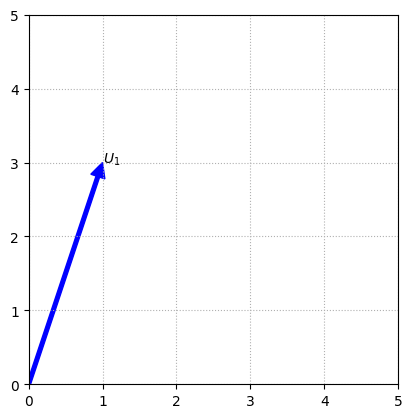

In [2]:
fig, ax = plt.subplots()
options = {"width":0.05,"head_width":0.2, "head_length":0.2, "length_includes_head":True}
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.text(1,3,'$U_1$')
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_aspect('equal')
ax.grid(True,ls=':')

What we've seen so far are *column vectors*. They stand like columns, instead of lying like rows. An example of two *row vectors* would be:

$$
\begin{equation}
U_5 = \begin{bmatrix} 5 & 8 \end{bmatrix} \hspace{1cm} 
U_6 = \begin{bmatrix} 27 & 9 \end{bmatrix}
\end{equation}
$$

However, we'll mostly be working with column vectors, so let's for now stick to them.

To write a column vector in numpy, you will use the ```np.array``` command with a set of outer brackets and each number in brackets.

In [3]:
U_1 = np.array([[1],[3]])
U_1

array([[1],
       [3]])

Why brackets around the numbers? Because that way we force numpy to recognize it's a column vector. 

A very important command for keeping track of matrices and vectors in numpy, is ```shape```:

In [4]:
U_1.shape

(2, 1)

The first number say that our vector has two rows, the second number says it has one column.

**REMEMBER:** In linear algebra as well as in all Python libraries like ```pandas``` and ```numpy``` the number of rows is expressed before the number of columns.

If we wanted to make a row vector, we'd instead use double brackets.

In [5]:
U_5 = np.array([[5,8]])

In [6]:
U_5.shape

(1, 2)

However, often it doesn't matter if a vector is a row or column vector. In that case we can use numpy simply like this:

In [7]:
vector = np.array([1,2])
vector.shape

(2,)

Now the vector has two rows, but no columns.

It is important to understand that it is the *length and direction* of this arrow that defines $U_1$, *not* the actual position.  We could draw the arrow in any number of locations, and it would still represent $U_1$. All of these vectors on the following slide are the same.

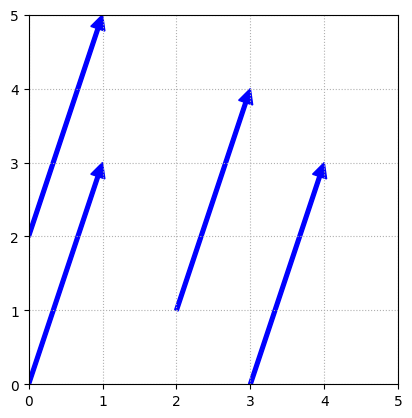

In [8]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.arrow(3,0,1,3,fc='b',ec='b',**options)
ax.arrow(0,2,1,3,fc='b',ec='b',**options)
ax.arrow(2,1,1,3,fc='b',ec='b',**options)
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_aspect('equal')
ax.grid(True,ls=':')

We can also create vectors using ```torch```. It works pretty much just like ```numpy```:

In [9]:
# forcing column vector notation
print(torch.tensor([[1],[3]]))
print(torch.tensor([[1],[3]]).shape)

tensor([[1],
        [3]])
torch.Size([2, 1])


In [10]:
# row vector
print(torch.tensor([[1,3]]))
print(torch.tensor([[1,3]]).shape)

tensor([[1, 3]])
torch.Size([1, 2])


In [11]:
print(torch.tensor([1,3]))
print(torch.tensor([1,3]).shape)

tensor([1, 3])
torch.Size([2])


In [22]:
np_ary = np.array([[1], [3]])
t_tensor = torch.from_numpy(np_ary)
print(type(np_ary))
print(np_ary)
print(type(np_ary))
print(t_tensor)

<class 'numpy.ndarray'>
[[1]
 [3]]
<class 'numpy.ndarray'>
tensor([[1],
        [3]])


### 2.1. Scalar multiplication

**Python:** ```*``` <br>
**NumPy:** ```*```, ```np.multiply``` <br>
**Tensor:** ```*```, ```torch.multiply```, ```torch.mul``` <br>
**Input:** Scalar along with vector  <br>
**Output:** Vector <br>

Vectors can be multiplied by scalars. When we perform a scalar multiplication, such as $2U_1$, we interpret it as multiplying the *length of the arrow* by the scalar. We change the *magnitude* but the *direction* stays the same.

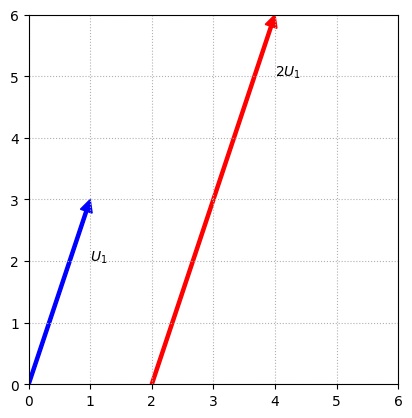

In [23]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.arrow(2,0,2,6,fc='r',ec='r',**options)
ax.text(1,2,'$U_1$')
ax.text(4,5,'$2U_1$')
ax.set_xlim(0,6)
ax.set_ylim(0,6)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,7,step = 1));
ax.set_yticks(np.arange(0,7,step = 1));

Doing scalar muliplication in ```numpy```is simple. We just use the ```*```symbol:

In [24]:
2*U_1

array([[2],
       [6]])

If the scalar is negative, we interpret the scalar multiplication as *reversing the direction* of the arrow, as well as changing the length.

In [25]:
-2*U_1

array([[-2],
       [-6]])

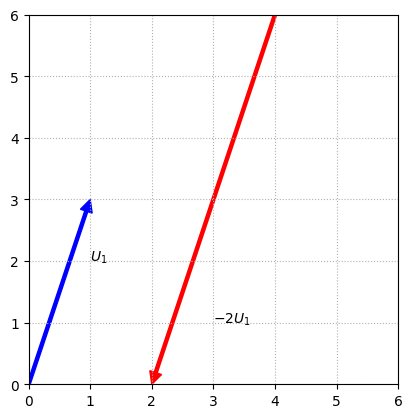

In [26]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.arrow(4,6,-2,-6,fc='r',ec='r',**options)
ax.text(1,2,'$U_1$')
ax.text(3,1,'$-2U_1$')
ax.set_xlim(0,6)
ax.set_ylim(0,6)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,7,step = 1));
ax.set_yticks(np.arange(0,7,step = 1));

Finally, to multiply a scalar and a vector with ```numpy```we can also use ```np.multiply```:

In [27]:
np.multiply(-2, U_1)

array([[-2],
       [-6]])

In [28]:
torch.multiply(-2, torch.tensor([1,3]))

tensor([-2, -6])

### 2.2. Vector Addition and Subtraction


**Expression:** $U_1 + U_2$, $U_1 - U_2$ <br>
**NumPy:** ```+``` and ```-``` or ```np.add``` and ```np.subtract``` <br>
**Torch:** ```+``` and ```-``` or ```torch.add``` and ```torch.subtract``` <br>
**Input:** Two or more vectors <br>
**Output:** One vector <br>

We can add vectors to each other, but to do so they *must be the same dimension*. So we can add our column vectors from above:

$$
\begin{equation}
U_1 + U_2 = 
\left[ \begin{array}{r} 1 \\ 3  \end{array}\right] + 
\left[ \begin{array}{r} 2 \\  -1   \end{array}\right] =
\left[ \begin{array}{r} 3 \\  2   \end{array}\right]
\end{equation}
$$

And we can add our two row vectors from above:

$$
\begin{equation}
U_5 + U_6 = \begin{bmatrix} 5 & 8 \end{bmatrix} + \begin{bmatrix} 27 & 9 \end{bmatrix} = \begin{bmatrix} 32 & 17 \end{bmatrix}
\end{equation}
$$

But we *cannot* add $U_1$ or $U_2$ to $U_5$ or $U_6$.

We can interpret the sum of two vectors as the result of aligning the two arrows tip to tail.

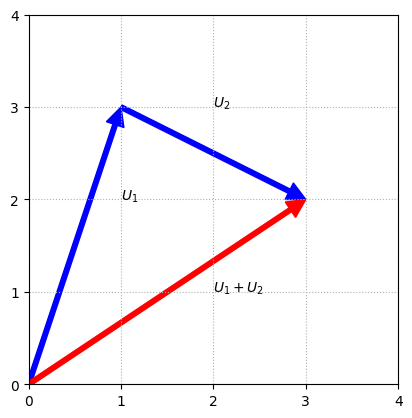

In [30]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='b',ec='b',**options)
ax.arrow(1,3,2,-1,fc='b',ec='b',**options)
ax.arrow(0,0,3,2,fc='r',ec='r',**options)
ax.text(1,2,'$U_1$'); ax.text(2,3,'$U_2$'); ax.text(2,1,'$U_1+U_2$')
ax.set_xlim(0,4); ax.set_ylim(0,4)
ax.set_aspect('equal'); ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,5,step = 1)); ax.set_yticks(np.arange(0,5,step = 1));

The sum of $U_1$ and $U_2$ would in this case be a new vector, which we've called $U_1 + U_2$ in the figure above.

There are two ways of adding vectors in ```numpy```:

In [31]:
U_2 = np.array([[2],[-1]])

In [32]:
U_1 + U_2

array([[3],
       [2]])

In [33]:
np.add(U_1, U_2)

array([[3],
       [2]])

When we do addition, we have to be careful, because neither base Python nor ```numpy``` handle adding vectors of different dimensions well. By consequence, we can end up creating very odd arrays. Adding $U_1$ to $U_5$ should not be possible, but with the ```+``` operator in Python:

In [34]:
U_1 + U_5

array([[ 6,  9],
       [ 8, 11]])

And with ```numpy.add```:

In [35]:
np.add(U_1, U_5)

array([[ 6,  9],
       [ 8, 11]])

And of course ```torch``` too:

In [44]:
torch.add(torch.tensor([1,2]), torch.tensor([1,2]))
a = torch.tensor([1,2], dtype=torch.float)
torch.norm(a)

tensor(2.2361)

### 2.3. Vector Norm

**Also known as:** Length, magnitude, Euclidean norm, 2-norm <br>
**Expression:** $\vert\vert U \vert\vert = \sqrt{U \cdot U}$ <br>
**NumPy:** ```np.linalg.norm``` <br>
**Input:** A vector <br>
**Output:** A scalar

One interesting thing we might want to know about vectors, is their length. How would be do this? The intuition can be found in Pythagora's theorem. If we imagine the triangle below, how would we calculate the length of the red side "c"? Well, we can use Pythagora's theorem.

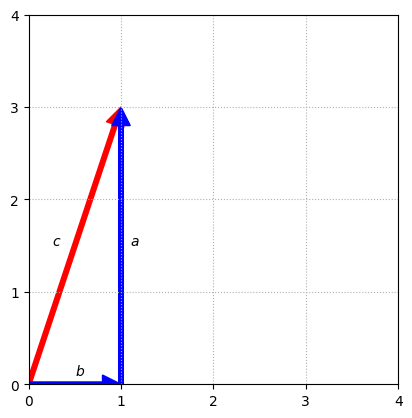

In [45]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='r',ec='r',**options)
ax.arrow(1,0,0,3,fc='b',ec='b',**options)
ax.arrow(0,0,1,0,fc='b',ec='b',**options)
ax.text(0.25,1.5,'$c$')
ax.text(1.1,1.5,'$a$')
ax.text(0.5,0.1,'$b$')
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

According to the theorem, the squaring and adding the length of the sides $a$ and $b$ will be equal to the square of $c$:

$$
\begin{equation}
a^2 + b^2 = c^2
\end{equation}
$$

Now, if we take the square root of both sides, we get the length of $c$:
    
$$
\begin{equation}
c = \sqrt{a^2 + b^2}
\end{equation}
$$

We can calculate the length of our vectors similarly. Imagine that our vector $U$ has it's coordinates drawn through lines that run first to it's first coordinate $u_1$ and then to the second $u_2$. Now the length of $\lVert U \rVert$ is calculated easily with Pythagora's theorem:

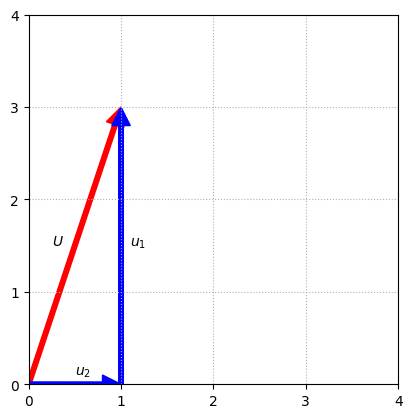

In [46]:
fig, ax = plt.subplots()
ax.arrow(0,0,1,3,fc='r',ec='r',**options)
ax.arrow(1,0,0,3,fc='b',ec='b',**options)
ax.arrow(0,0,1,0,fc='b',ec='b',**options)
ax.text(0.25,1.5,'$U$')
ax.text(1.1,1.5,'$u_1$')
ax.text(0.5,0.1,'$u_2$')
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

$$
\begin{equation}
\vert\vert U \vert\vert = \sqrt{u_1^2 + u_2^2}
\end{equation}
$$

Turns out we can extend this logic to several dimensions. Let's now instead define $U$ as having $n$ elements, like so:

$$
\begin{equation}
U = \left[ \begin{array}{r} u_1 \\ u_2 \\ \vdots \\ u_n  \end{array}\right]
\end{equation}
$$

Then the length or **norm** of $U$ is found by squaring and adding each of those coordinates and then taking the square root of the resulting number:

$$
\begin{equation}
\vert\vert U \vert\vert = \sqrt{u_1^2 + u_2^2 ... u_n^2}
\end{equation}
$$

If we wanted to calculate the vector norm in Python without numpy or torch, we could do the following:

In [47]:
math.sqrt(sum([u * u for u in np.array([1,3])]))

3.1622776601683795

However, it's much easier to use the built-in commands in numpy:

In [48]:
np.linalg.norm(U_1)

3.1622776601683795

And torch:

In [49]:
torch.tensor([[1.0,3.0]]).norm()

tensor(3.1623)

In [50]:
torch.linalg.norm(torch.tensor([[1.0,3.0]]))

tensor(3.1623)

### 2.4. The Dot Product

**Also known as:** Inner product, scalar product, projection product <br>
**Expression**: $U \cdot V$ <br>
**Python:** ```@``` <br>
**NumPy:** ```np.dot``` <br>
**NumPy:** ```torch.dot``` <br>
**Input:** Two vectors <br>
**Output:** Scalar <br>

The idea of the vector norm can be generalized to apply to any two vectors. Let's define $U$ and $V$ as vectors in $\mathbb{R}^n$. This means that they consist of real numbers and are of $n$ length:

$$
\begin{equation}
U = \left[ \begin{array}{r} u_1 \\ u_2 \\ \vdots \\ u_n  \end{array}\right] \hspace{1cm} 
V = \left[ \begin{array}{r} v_1 \\ v_2 \\ \vdots \\ v_n \end{array}\right]
\end{equation}
$$

Now, if we perform

$$
\begin{equation}
U \cdot V = u_1v_1 + u_2v_2 + ... + u_nv_n
\end{equation}
$$

The **dot product**, also called **scalar** or **inner product**, is a measure of how closely two vectors align, in terms of the directions they point. To get a sense of this, let's look through a number of illustrated examples.

First, let's look at the dot product of two vectors that are overlapping but of different length.

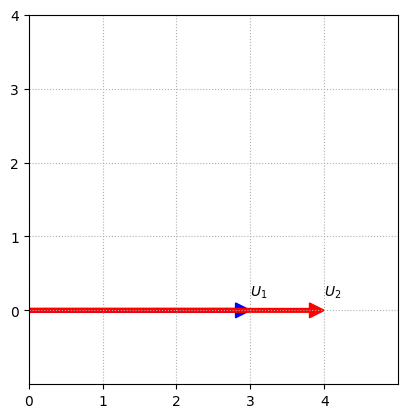

In [52]:
fig, ax = plt.subplots()

ax.arrow(0,0,3,0,fc='b',ec='b',**options)
ax.arrow(0,0,4,0,fc='r',ec='r',**options)

ax.text(3,.2,'$U_1$')
ax.text(4,.2,'$U_2$')

ax.set_xlim(0,5)
ax.set_ylim(-1,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')

ax.set_xticks(np.arange(0,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

To take the dot product with ```numpy``` we write ```np.dot```. This will work whether the input is lists or ```np``` arrays:

In [53]:
np.dot([3,0],[4,0])

12

Since Python 3.5, we can also use the ```@``` sign. However, for this to work the multiplicand and the multiplier need to be defined as ```np``` arrays:

In [54]:
np.array([3,0]) @ np.array([4,0])

12

We'll use ```np.dot``` in this presentation, but in general the new ```@```notation is really powerful and much more legible.

To get back to the example, what is the dot product if we use overlapping vectors of similar length? Well, a positive number, but slightly lower:

In [55]:
np.dot([3,0],[3,0])

9

Now, what happens if we change the angle?

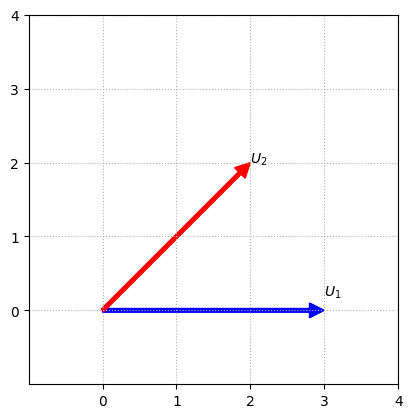

In [56]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options)
ax.arrow(0,0,2,2,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$')
ax.text(2,2,'$U_2$')
ax.set_xlim(-1,4)
ax.set_ylim(-1,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

In [57]:
np.dot([3,0],[2,2])

6

The number is still positive! But what if we make the angle 90 degrees?

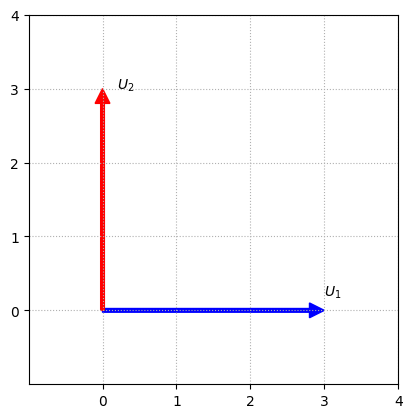

In [58]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options)
ax.arrow(0,0,0,3,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$'); ax.text(.2,3,'$U_2$')
ax.set_xlim(-1,4); ax.set_ylim(-1,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(0,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

In [59]:
np.dot([3,0],[0,3])

0

Now the dot product is zero! This will be true for any vector. No matter their length, two vectors at a ninety degree angle will *always* have a dot product of zero. So if $\theta$ is the angle between vectors $U$ and $V$ and

$$
U \cdot V = 0
$$

then:

$$
\theta = 90
$$

One way to interpret this is that the vectors have nothing in common. They are orthogonal to each other.

What if the vectors point in opposite directions?

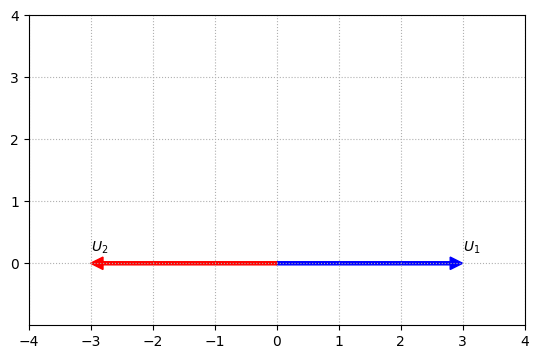

In [60]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options); ax.arrow(0,0,-3,0,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$'); ax.text(-3,.2,'$U_2$')
ax.set_xlim(-4,4); ax.set_ylim(-1,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(-4,5,step = 1));
ax.set_yticks(np.arange(0,5,step = 1));

In [61]:
np.dot([3,0],[-3,0])

-9

The dot product will be negative! This will be true for all angles that area over 90:

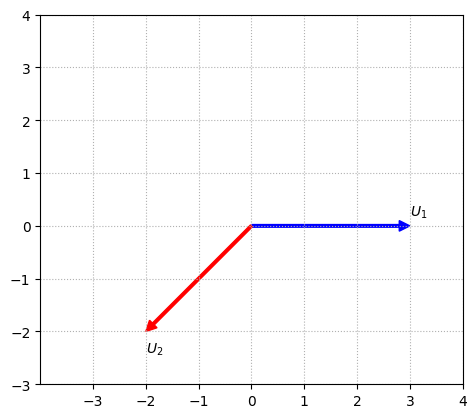

In [62]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options); ax.arrow(0,0,-2,-2,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$'); ax.text(-2,-2.4,'$U_2$')
ax.set_xlim(-4,2); ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(-3,5,step = 1));
ax.set_yticks(np.arange(-3,5,step = 1));

In [63]:
np.dot([3, 0],[-2, -2])

-6

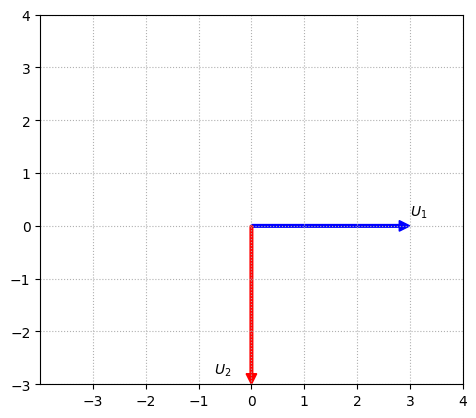

In [64]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options); ax.arrow(0,0,0,-3,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$'); ax.text(-.7,-2.8,'$U_2$')
ax.set_xlim(-4,2); ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(-3,5,step = 1));
ax.set_yticks(np.arange(-3,5,step = 1));

In [65]:
np.dot([3, 0],[0, -3])

0

But once we get over 270, the numbers become positive again.

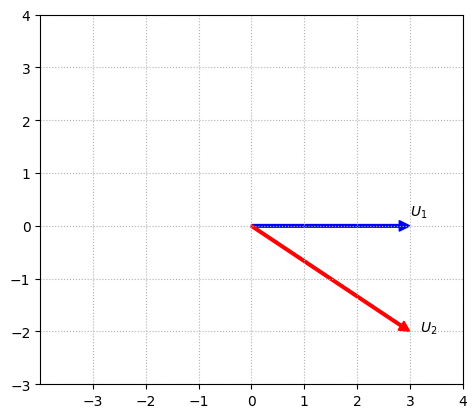

In [66]:
fig, ax = plt.subplots()
ax.arrow(0,0,3,0,fc='b',ec='b',**options); ax.arrow(0,0,3,-2,fc='r',ec='r',**options)
ax.text(3,.2,'$U_1$'); ax.text(3.2,-2,'$U_2$')
ax.set_xlim(-4,2); ax.set_ylim(-3,4)
ax.set_aspect('equal')
ax.grid(True,ls=':')
ax.set_xticks(np.arange(-3,5,step = 1)); ax.set_yticks(np.arange(-3,5,step = 1));

In [67]:
np.dot([3, 0],[3, -2])

9

This "cycle" follows the cycle of the cosine:

| Degrees $(\theta)$ | Radians $(\theta)$ | Cos $(\theta)$ |
|--------------------|--------------------|----------------|
|    $0$             |   $0$              |  $1$           |
|    $90$            |  $\frac{\pi}{2}$   |  $0$           |
|    $180$           |  $\pi$             |  $-1$          |
|    $270$           |  $\frac{3\pi}{2}$  |   $0$          |
|    $360$           |  $2\pi$            |   $1$          |

However, while the cycle tells us when the dot product it zero, positive, or negative, we cannot say anything else of the angle. Why? Because the magnitudes of the two vectors will make the numbers fluctuate drastically. To get a better sense of the exact angle, we need to account for the magnitude of the vectors somehow.

But first, yes of course we can also do all of this in ```Torch```:

In [68]:
torch.dot(torch.tensor([3, 0]),
          torch.tensor([3, -2]))

tensor(9)

### 2.5. Cosine similarity

**Also known as:** Inner product, scalar product, projection product <br>
**Expression**: $\frac{U \cdot V}{\lVert U \rVert \lVert V \rVert}$ <br>
**NumPy:** ```np.dot``` <br>
**NumPy:** ```torch.dot``` <br>
**Input:** Two vectors <br>
**Output:** Scalar between -1 and 1 <br>

The dot product captures something about . But what if we don't care about the length of the vectors? What if we just want to know how the align in terms of direction? The **cosine similarity** does just this. 

To calculate the cosine of the *angle* $\theta$ between $U$ and $V$ we do the following:

$$
\begin{equation}
\cos{\theta} = \frac{U \cdot V}{\lVert U \rVert \lVert V \rVert}
\end{equation}
$$

The take the dot product of $U$ and $V$ and we "normalize" it by the product of the norm of both vectors.

The cosine similarity has some neat properties:

- It only measures the angle between two vectors
- It's always between -1 and 1, just like the cosine of an angle

In NLP, cosine similarity is one of the most important tools, because it allows us to measures how similar representations of text as vectors are to each other!

Let's try to write a function that formalizes the mathematical formula above!

In [69]:
def cosine_similarity(u, v):
    dot_prod = np.dot(u,v)
    u_norm = np.linalg.norm(u)
    v_norm = np.linalg.norm(v)
    
    return dot_prod / (u_norm * v_norm)

Let's try it out!

As expected, to cosine similarity between two orthogonal vectors is zero. They have nothing in common:

In [70]:
cosine_similarity([3,0], [0,3])

0.0

And, now, it doesn't matter how long they are:

In [71]:
cosine_similarity([10,0], [0,10])

0.0

Vectors pointing in the opposite direction have maximum dissimilarity at -1:

In [72]:
cosine_similarity([10,0], [-10,0])

-1.0

And vectors pointing in the same direction have maximum similarity at 1:

In [73]:
cosine_similarity([10,0], [10,0])

1.0

## 3. Matrices

**NumPy:** ```np.array``` <br>
**Torch:** ```torch.tensor``` <br>

There are four algebraic operations for matrices that we will need to perform.  For our definitions let us suppose that:

- $A$ and $B$ are $m \times n$ matrices, i.e. they are in $\mathbb{R}^{m \times n}$,
- $C$ is an $n \times k$ matrix,  i.e. it's in $\mathbb{R}^{n \times k}$ and 
- $c$ is a number, i.e. it's in $\mathbb{R}$.  


To make things clearer, let's define these matrices. We will give $A$ and $B$ the dimensions $3 \times 2$ and we'll give $C$ the dimensions $2 \times 4$. Our scalar is $c=2$.

In [74]:
A = np.array([[1,2], [3,4], [5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [75]:
B = np.array([[2,2], [1,1], [2,2]])
B

array([[2, 2],
       [1, 1],
       [2, 2]])

In [59]:
C = np.array([[1,2,3,4], [4,3,2,1]])
C

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [60]:
c = 2

### 3.1. Scalar multiplication

**Python:** ```*``` <br>
**NumPy:**```np.dot``` <br>
**Torch**: ```*``` <br>
**Input:** Scalar along with matrix  <br>
**Output:** Matrix <br>

A matrix of any shape can be multiplied by a scalar.  The result is that all entries are multiplied by that scalar.  Using the subscript notation, we would write

$$
(cA)_{ij} = ca_{ij}
$$


In [61]:
c*A

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [62]:
np.dot(c, A)

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [63]:
c * torch.tensor(A)

tensor([[ 2,  4],
        [ 6,  8],
        [10, 12]])

### 3.2. Matrix Addition and Subtraction

**Python:** ```+``` and ```-``` <br>
**NumPy:**```np.add``` and ```np.subtract``` <br>
**Torch**: ```torch.add``` and ```torch.subtract``` <br>

Two matrices that *have the same shape* can be added.  The result is that all corresponding entries are added.

$$
(A+B)_{ij} = a_{ij} + b_{ij}
$$

In [70]:
A + B

array([[3, 4],
       [4, 5],
       [7, 8]])

In [71]:
np.add(A, B)

array([[3, 4],
       [4, 5],
       [7, 8]])

In [72]:
torch.add(torch.tensor(A), 
          torch.tensor(B))

tensor([[3, 4],
        [4, 5],
        [7, 8]])

In [73]:
A - B

array([[-1,  0],
       [ 2,  3],
       [ 3,  4]])

In [74]:
np.subtract(A, B)

array([[-1,  0],
       [ 2,  3],
       [ 3,  4]])

In [75]:
torch.subtract(torch.tensor(A), 
               torch.tensor(B))

tensor([[-1,  0],
        [ 2,  3],
        [ 3,  4]])

### 3.3. Element-wise multiplication

**Names:** [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)), element-wise product, entrywise product <br>
**Python:** ```*``` <br>
**NumPy:**```np.multiply``` <br>
**Torch**: ```torch.mul``` <br>


Two matrices that *have the same shape* can be multiplied *element-wise*. This is different from matrix multiplication, which is described below. The result of element-wise multiplication of matrices $A, B$ is a new matrix $AB$ with the same dimensions as $A$ and $B$. The result is that all corresponding entries are multiplied.

$$
(A \odot B)_{ij} = a_{ij} \dot b_{ij}
$$


In Python, we do this using the ```*```:

In [76]:
A*B

array([[ 2,  4],
       [ 3,  4],
       [10, 12]])

As we can see, it doesn't matter in which order we do element-wise multiplication:

In [77]:
B*A

array([[ 2,  4],
       [ 3,  4],
       [10, 12]])

In NumPy, the appropriate function ```np.multiply```...

In [78]:
np.multiply(A,B)

array([[ 2,  4],
       [ 3,  4],
       [10, 12]])

...and in Torch, it is ```torch.mul```:

In [79]:
torch.mul(torch.tensor(A), 
          torch.tensor(B))

tensor([[ 2,  4],
        [ 3,  4],
        [10, 12]])

### 3.4. Matrix multiplication

**Names:** Matrix multiplication, matrix product, Dot product (for vectors, but used more widely) <br>
**Python:** ```@``` <br>
**NumPy:**```np.dot``` <br>
**Torch**: ```torch.matmul``` <br>
**Input**: ```n x m```and ```m x k``` matrices <br>
**Output:** ```n x k``` matrix

- If the number of columns of matrix $A$ is equal to the number of rows of matrix $C$, the matrices can be multiplied in the order $A$, $C$. 
- The result will be a new matrix $AC$, that has the same number of rows as $A$ and the same number of columns as $C$. 
- The entries $(AC)_{ij}$ will be the following combination of the entries of row $i$ of $A$ and column $j$ of $B$.

$$
(AC)_{ij} = \sum_{k=1}^n a_{ik}c_{kj}
$$

In [80]:
A.shape

(3, 2)

In [81]:
C.shape

(2, 4)

In [82]:
A.shape[1] == C.shape[0]

True

In [83]:
A @ C

array([[ 9,  8,  7,  6],
       [19, 18, 17, 16],
       [29, 28, 27, 26]])

In [84]:
(A @ C).shape

(3, 4)

In [85]:
(A @ C).shape[0] == A.shape[0]

True

In [86]:
(A @ C).shape[1] == C.shape[1]

True

And, of course, we could do all of this with numpy...

In [87]:
np.dot(A, C)

array([[ 9,  8,  7,  6],
       [19, 18, 17, 16],
       [29, 28, 27, 26]])

... or torch.

In [88]:
torch.matmul(torch.tensor(A), 
             torch.tensor(C))

tensor([[ 9,  8,  7,  6],
        [19, 18, 17, 16],
        [29, 28, 27, 26]])

However, if we try to multiply the matrices in reverse order, there will be trouble:

In [89]:
np.dot(C,A)

ValueError: shapes (2,4) and (3,2) not aligned: 4 (dim 1) != 3 (dim 0)

In [90]:
C @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [91]:
torch.matmul(torch.tensor(C), 
             torch.tensor(A))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x4 and 3x2)

### 3.5. Special Types of Matrices

- There are very many different types of "special" matrices
- There are a couple we might touch upon durin these course

#### 3.5.1. Transpose

Turns rows into columns and columns into rows.

In [92]:
np.transpose(A)

array([[1, 3, 5],
       [2, 4, 6]])

In [93]:
torch.transpose(torch.tensor(A), 0, 1)

tensor([[1, 3, 5],
        [2, 4, 6]])

#### 3.5.2. Identity

Effectively the number 1 of matrix operations:

In [94]:
np.array([[1,0,0],[0,1,0],[0,0,1]])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [95]:
np.array([[1,0,0],[0,1,0],[0,0,1]]) @ np.array([1,2,3])

array([1, 2, 3])

In [96]:
np.array([[1,0,0],[0,1,0],[0,0,1]]) @ np.array([[1,2,3], [4,5,6], [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])